<a href="https://colab.research.google.com/github/yanghyeon408/OpenCV/blob/master/04_%EC%9C%A4%EA%B3%BD%EC%84%A0_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04 윤곽선 검출

# 4.1 필터

In [ ]:
import numpy as np
import cv2

def sharpen(img):
    A = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(height):
        for x in range(width):
            try:
                S =  0*img[y-1, x-1] + -1*img[y-1, x] +  0*img[y-1, x+1] \
                  + -1*img[y,   x-1] +  5*img[y,   x] + -1*img[y,  x+1] \
                  +  0*img[y+1, x-1] + -1*img[y+1, x] +  0*img[y+1, x+1]
                if S > 255:
                    A[y, x] = 255
                elif S<0:
                    A[y, x] = 0
                else:
                    A[y, x] = S
            except:
                pass
    return A

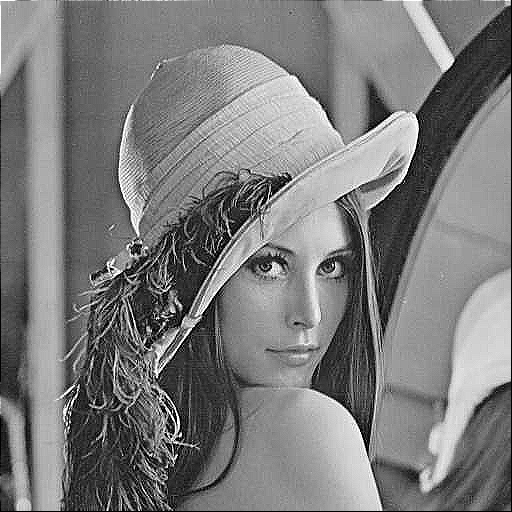

In [ ]:
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(sharpen, img)

##차분필터

In [ ]:
import numpy as np
import cv2

def diff_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try:
                H = 0*img[y-1, x-1] + 0*img[y-1, x] + 0*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 1*img[y,   x] + -1*img[y,  x+1] \
                  + 0*img[y+1, x-1] + 0*img[y+1, x] + 0*img[y+1, x+1]

                V = 0*img[y-1, x-1] + 0*img[y-1, x] + 0*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 1*img[y,   x] + 0*img[y,   x+1] \
                  + 0*img[y+1, x-1] + -1*img[y+1,x] + 0*img[y+1, x+1]

                img_[y,x] = np.sqrt(H**2 + V**2)
            except:
                pass
    return img_ 

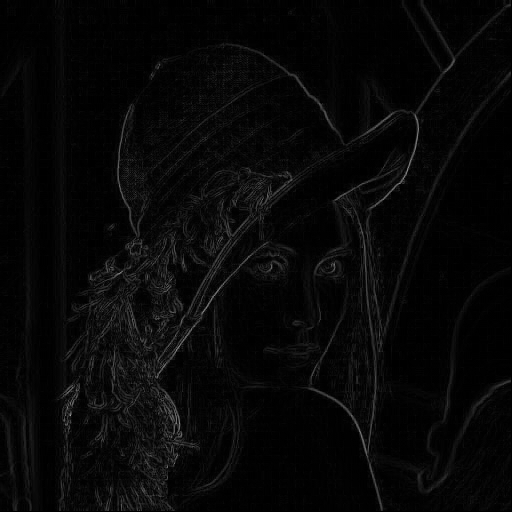

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(diff_filter, img)

##로버츠 필터  
대각성 성분이 많이 차지 할꺼다

In [ ]:
def reverts_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try:
                H = 0*img[y-1, x-1] + 0*img[y-1, x] + 0*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 1*img[y,   x] + 0*img[y,  x+1] \
                  + 0*img[y+1, x-1] + 0*img[y+1, x] + -1*img[y+1, x+1]

                V = 0*img[y-1, x-1] + 0*img[y-1, x] + 0*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 0*img[y,   x] + 1*img[y,   x+1] \
                  + 0*img[y+1, x-1] + -1*img[y+1,x] + 0*img[y+1, x+1]
                
                img_[y, x] = np.sqrt(H**2 + V**2)
            except:
                pass
    return img_



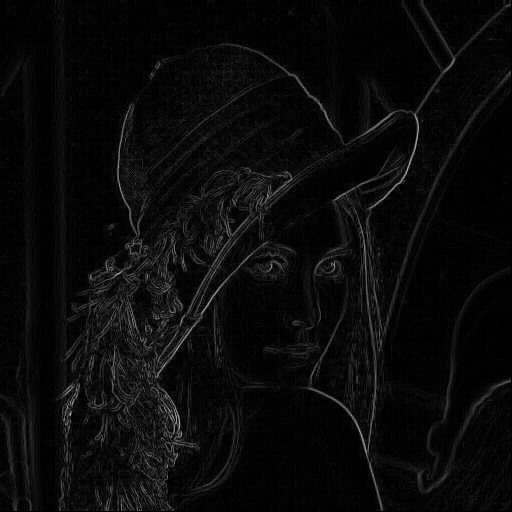

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(reverts_filter, img)

In [ ]:
def prewitt_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    lenagray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
    for y in range(len(lenagray)):
        for x in range(len(lenagray[0])):
            try:
                H = 1*img[y-1, x-1] + 0*img[y-1, x] + -1*img[y-1, x+1] \
                  + 1*img[y,   x-1] + 0*img[y,   x] + -1*img[y,  x+1] \
                  + 1*img[y+1, x-1] + 0*img[y+1, x] + -1*img[y+1, x+1]

                V = 1*img[y-1, x-1] + 1*img[y-1, x] + 1*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 0*img[y,   x] + 0*img[y,   x+1] \
                  + -1*img[y+1, x-1] + -1*img[y+1,x] + -1*img[y+1, x+1]
                
                img_[y, x] = (np.abs(H) + np.abs(V)) /2
            except:
                pass
    return img_

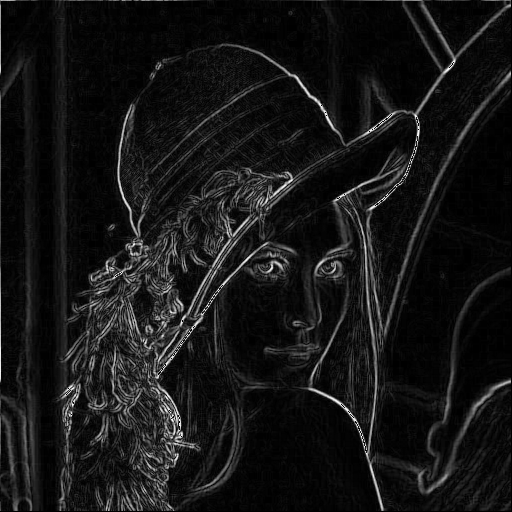

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(prewitt_filter, img)

##소벨 필터

In [ ]:
def sovel_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    lena_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
    for y in range(len(lena_gray)):
        for x in range(len(lena_gray[0])):
            try:
                H = 1*img[y-1, x-1] + 0*img[y-1, x] + -1*img[y-1, x+1] \
                  + 2*img[y,   x-1] + 0*img[y,   x] + -2*img[y,  x+1] \
                  + 1*img[y+1, x-1] + 0*img[y+1, x] + -1*img[y+1, x+1]

                V = 1*img[y-1, x-1] + 2*img[y-1, x] + 1*img[y-1, x+1] \
                  + 0*img[y,   x-1] + 0*img[y,   x] + 0*img[y,   x+1] \
                  + -1*img[y+1, x-1] + -2*img[y+1,x] + -1*img[y+1, x+1]
                
                img_[y, x] = (np.abs(H) + np.abs(V)) /2
            except:
                pass
    return img_

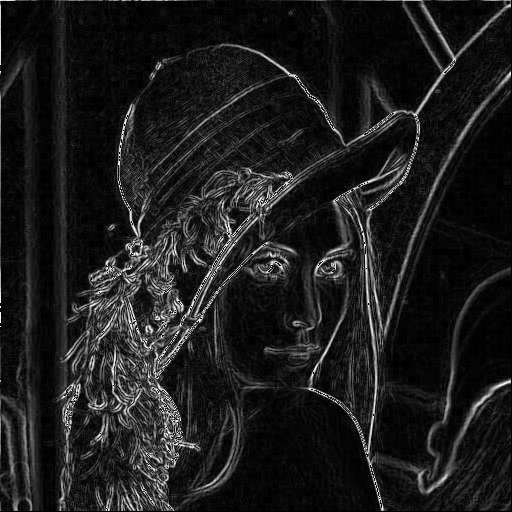

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(sovel_filter, img)

##라플라시안 필터

In [ ]:
def laplacian1_filter(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    lena_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
    for y in range(len(lena_gray)):
        for x in range(len(lena_gray[0])):
            try:
                T = 0*img[y-1, x-1] + -1*img[y-1, x] + 0*img[y-1, x+1] \
                  + -1*img[y,  x-1] +  4*img[y,   x] + -1*img[y,  x+1] \
                  + 0*img[y+1, x-1] + -1*img[y+1, x] + 0*img[y+1, x+1]

                img_[y, x] =np.abs(T)
            except:
                pass
    return img_

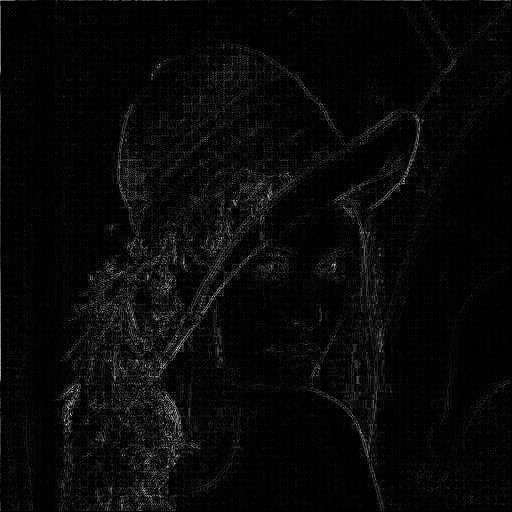

In [ ]:
import cv2
from yh import img_pro
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img_pro(laplacian1_filter, img)

##Conv2D

In [ ]:
import numpy as np


def Conv2d(img, mask = None, padding='valid'):
    img_out = np.zeros(img.shape, dtype=np.uint8)
    if mask is not None:
        #stride = mask.shape
        sy, sx = int(len(mask)/2), int(len(mask[0])/2)
        #print(sy, sx)
        if padding =='same':
            pass
        elif padding =='valid':
            height, width = img_out.shape
            for y in range(sy, height - sy):
                for x in range(sx, width-sx):
                    roi = img[y-sy:y+sy+1, x - sx: x + sx +1]
                    filtered = roi * mask
                    img_out[y, x] = np.uint8(np.abs(np.sum(filtered)))
            return img_out
    else:
        print("Mask array not found!")
    return img_out


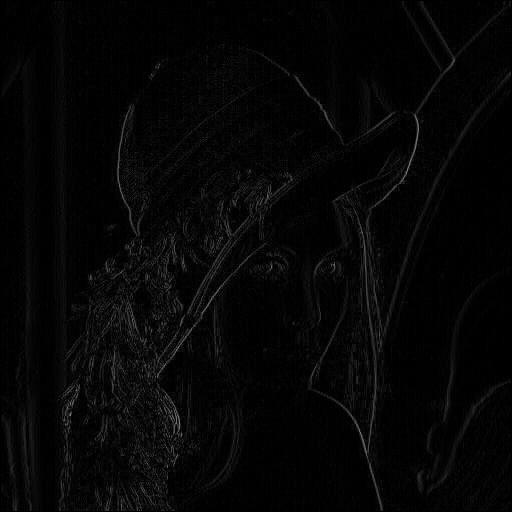

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
    
lena_img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
mask = np.array([[0, 0, 0], [0, 1, -1], [0, 0, 0]])
cv2_imshow(Conv2d(lena_img, mask=mask))

#4.2 캐니 엣지

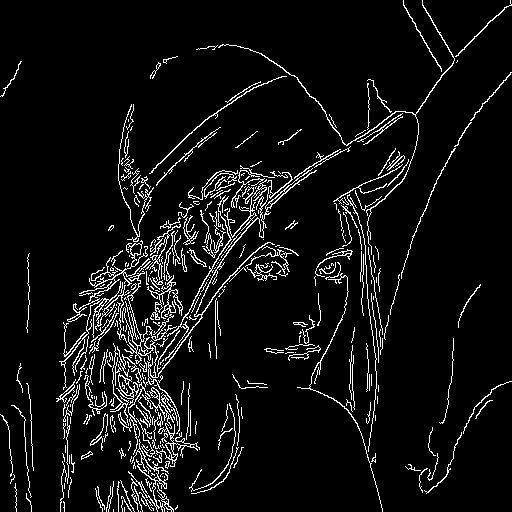

In [ ]:
import numpy as np
import cv2


img = cv2.imread('lena.jpg')
edges = cv2.Canny(img, 100, 200)

from google.colab.patches import cv2_imshow
cv2_imshow(edges)